# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm # To chek execution i just imported this
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

<pre>
<font color='red'><b>Precision</b></font> is the number of True Positives divided by the number of True Positives and False Positives. Put another way, it is the number of positive predictions divided by the total number of positive class values predicted. It is also called the Positive Predictive Value (PPV).<strong>Precision can be thought of as a measure of a classifiers exactness. A low precision can also indicate a large number of False Positives.</strong>
   
<pre>

<pre>
<font color='red'><b>Recall (Sensitivity)</b></font> is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.<strong>Recall = TP/TP+FN</strong>
   
<pre>

<pre>
<font color='red'><b>F1 score </b></font> is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.<strong>F1 Score = 2*(Recall * Precision) / (Recall + Precision)</strong>
   
<pre>

  7%|█████▋                                                                            | 7/101 [00:00<00:01, 61.52it/s]

True Positive 10000
True Negative 0
False Positive 100
False Negative 0
F1_score - 0.9950248756218906
Accuracy_score - 0.9900990099009901


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:02<00:00, 46.59it/s]


Area Under Curve - 0.4580425


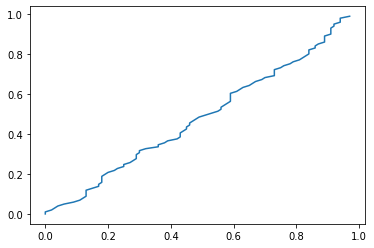

In [2]:
# write your code here

# Read 5_a csv file
df_a  = pd.read_csv('5_a.csv')

df_a.head()

# Step 1 Find Y_predict using probablity
# In the Dataset we have large postive les negative

df_a.loc[df_a['proba'] >= 0.5, 'y_predict'] = 1  
df_a.loc[df_a['proba'] < 0.5, 'y_predict'] = 0

df_a.head()

# Step 2 Calculate Confusion matrix
True_postive= 0
True_negative =0
False_postive =0
False_negative =0



for i,j in zip(df_a['y'],df_a['y_predict']):
    if i==1.0 and j==1.0:
        True_postive += 1
    elif i==0.0 and j==1.0:
        False_postive += 1
    elif i==1.0 and j==0.0:
        False_negative += 1
    elif i==0.0 and j==0.0:
        True_negative += 1

print('True Positive ' + str(True_postive))
print('True Negative ' + str(True_negative))
print('False Positive ' + str(False_postive))
print('False Negative ' + str(False_negative))


# Step 3  - F1 Score
# F1 score = 2*((precision*recall)/(precision+recall)).
# precision = TP/TP+FN
# Recall = TP / Tp+FP

precision  = True_postive/ (True_postive+False_negative)
Recall     = True_postive/ (True_postive+False_postive)
F1_score   = 2*((precision * Recall) / (precision+ Recall))
print('F1_score - ' +str(F1_score))

# Step 4 Accuracy
Accuracy = (True_postive + True_negative) / (True_postive+True_negative+False_postive+False_negative)
print('Accuracy_score - ' +str(Accuracy))

# Step5 AUC Curve

df_a = df_a.sort_values(by=['proba'],axis=0,ascending=False,ignore_index= True)
prob_value_df = df_a['proba']
list_number =  list(range(0,len(prob_value_df),100))
prob_value_df  = prob_value_df[list_number]

df_a.head()

prob_value_df

True_positive_rate = []
False_positive_rate =[]
for prob_i in tqdm(prob_value_df):
    
    #convert = lambda x : 1.0 if x >= prob_i else 0.0
    df_a.loc[df_a['proba'] >= prob_i, 'y_'+str(prob_i)] = 1  
    df_a.loc[df_a['proba'] < prob_i, 'y_'+str(prob_i)] = 0
    True_postive= 0
    True_negative =0
    False_postive =0
    False_negative =0
    for i,j in zip(df_a['y'],df_a['y_'+str(prob_i)]):
        if i==1.0 and j==1.0:
            True_postive += 1
        elif i==0.0 and j==1.0:
            False_postive += 1
        elif i==1.0 and j==0.0:
            False_negative += 1
        elif i==0.0 and j==0.0:
            True_negative += 1
    TP_rate = ((True_postive) /(True_postive+False_negative))
    FP_rate = ((False_postive) /(True_negative+False_postive))
    True_positive_rate.append(TP_rate)
    False_positive_rate.append(FP_rate)

        

import matplotlib.pyplot as plt
plt.plot(False_positive_rate,True_positive_rate)

True_positive_rate  = np.array(True_positive_rate)
False_positive_rate = np.array(False_positive_rate)

pAUC = np.trapz(True_positive_rate, False_positive_rate)

print('Area Under Curve - '+str(pAUC))
#Note  - 0 - Model Terrible
#        1 - Good Model

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

True Positive 55
True Negative 9761
False Positive 239
False Negative 45


  7%|█████▋                                                                            | 7/101 [00:00<00:01, 65.23it/s]

F1_score - 0.2791878172588833
Accuracy_score - 0.9718811881188119


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:02<00:00, 45.27it/s]


Area Under Curve - 0.9263505000000001


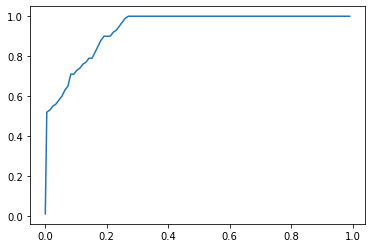

In [3]:
# write your code

# Import Required Package
import numpy as np
import pandas as pd
from tqdm import tqdm

# Read 5_a csv file
df_a  = pd.read_csv('5_b.csv')

df_a.head()

# Step 1 Find Y_predict using probablity
# In the Dataset we have large postive les negative

df_a.loc[df_a['proba'] >= 0.5, 'y_predict'] = 1  
df_a.loc[df_a['proba'] < 0.5, 'y_predict'] = 0

df_a.head()

# Step 2 Calculate Confusion matrix
True_postive= 0
True_negative =0
False_postive =0
False_negative =0



for i,j in zip(df_a['y'],df_a['y_predict']):
    if i==1.0 and j==1.0:
        True_postive += 1
    elif i==0.0 and j==1.0:
        False_postive += 1
    elif i==1.0 and j==0.0:
        False_negative += 1
    elif i==0.0 and j==0.0:
        True_negative += 1

print('True Positive ' + str(True_postive))
print('True Negative ' + str(True_negative))
print('False Positive ' + str(False_postive))
print('False Negative ' + str(False_negative))


from sklearn.metrics import confusion_matrix
confusion_matrix(df_a['y'],df_a['y_predict'])



# Step 3  - F1 Score
# F1 score = 2*((precision*recall)/(precision+recall)).
# precision = TP/TP+FN
# Recall = TP / Tp+FP

precision  = True_postive/ (True_postive+False_negative)
Recall     = True_postive/ (True_postive+False_postive)
F1_score   = 2*((precision * Recall) / (precision+ Recall))
print('F1_score - ' +str(F1_score))

# Step 4 Accuracy
Accuracy = (True_postive + True_negative) / (True_postive+True_negative+False_postive+False_negative)
print('Accuracy_score - ' +str(Accuracy))

# Step5 AUC Curve

df_a = df_a.sort_values(by=['proba'],axis=0,ascending=False,ignore_index= True)
prob_value_df = df_a['proba']
list_number =  list(range(0,len(prob_value_df),100))
prob_value_df  = prob_value_df[list_number]

df_a.head()

prob_value_df

True_positive_rate = []
False_positive_rate =[]
for prob_i in tqdm(prob_value_df):
    
    #convert = lambda x : 1.0 if x >= prob_i else 0.0
    df_a.loc[df_a['proba'] >= prob_i, 'y_'+str(prob_i)] = 1  
    df_a.loc[df_a['proba'] < prob_i, 'y_'+str(prob_i)] = 0
    True_postive= 0
    True_negative =0
    False_postive =0
    False_negative =0
    for i,j in zip(df_a['y'],df_a['y_'+str(prob_i)]):
        if i==1.0 and j==1.0:
            True_postive += 1
        elif i==0.0 and j==1.0:
            False_postive += 1
        elif i==1.0 and j==0.0:
            False_negative += 1
        elif i==0.0 and j==0.0:
            True_negative += 1
    TP_rate = ((True_postive) /(True_postive+False_negative))
    FP_rate = ((False_postive) /(True_negative+False_postive))
    True_positive_rate.append(TP_rate)
    False_positive_rate.append(FP_rate)

        

import matplotlib.pyplot as plt
plt.plot(False_positive_rate,True_positive_rate)

True_positive_rate  = np.array(True_positive_rate)
False_positive_rate = np.array(False_positive_rate)

pAUC = np.trapz(True_positive_rate, False_positive_rate)

print('Area Under Curve - '+str(pAUC))
#Note  - 0 - Model Terrible
#        1 - Good Model

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [4]:
# write your code

# Read 5_ac csv file
df_a  = pd.read_csv('5_c.csv')
df_a.head(5)

df_a = df_a.sort_values(by=['prob'],axis=0,ascending=False,ignore_index= True)
prob_value_df = df_a['prob']
list_number =  list(range(0,len(prob_value_df),100))
prob_value_df  = prob_value_df[list_number]
    
All_thershold = {}
for prob_i in tqdm(prob_value_df):
    
    #convert = lambda x : 1.0 if x >= prob_i else 0.0
    df_a.loc[df_a['prob'] >= prob_i, 'y_'+str(prob_i)] = 1  
    df_a.loc[df_a['prob'] < prob_i, 'y_'+str(prob_i)] = 0
    True_postive= 0
    True_negative =0
    False_postive =0
    False_negative =0
    for i,j in zip(df_a['y'],df_a['y_'+str(prob_i)]):
        if i==1.0 and j==1.0:
            True_postive += 1
        elif i==0.0 and j==1.0:
            False_postive += 1
        elif i==1.0 and j==0.0:
            False_negative += 1
        elif i==0.0 and j==0.0:
            True_negative += 1
    FP_rate = False_postive
    FN_rate = False_negative
    All_thershold[prob_i]  = (500*FN_rate) + (100*FP_rate)



sorted_thershold = {k: v for k, v in sorted(All_thershold.items(), key=lambda item: item[1],reverse=False)}

print('Thershold which has low False postive and False Negative is : ' +str(list(sorted_thershold)[0]))


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 104.78it/s]

Thershold which has low False postive and False Negative is : 0.2440750461977881


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [7]:
df_d  = pd.read_csv('5_d.csv')
df_d.head(5)

# SubTask 1 FInd Compute Mean Square Error
MSE = 0
total_data = len(df_d['y'])
for y,predict in zip(df_d['y'],df_d['pred']):
    MSE= (MSE + (y-predict)**2)

MSE = MSE/total_data
print('Mean Square Error is '+ str(MSE))

# SubTask 2 Find Mean Square Absolute error 
def mean_absolute_percentage_error(y_true, y_pred): 
    test_zero = (y_true == 0).sum(axis=0)
    MAPE_numerator = 0
    MAPE_Demonitator=sum(y_true)
    
    if test_zero != 0:
        for actual, predict in zip(y_true,y_pred):
            MAPE_numerator =MAPE_numerator + (np.abs(predict-actual))
        MAPE  = (MAPE_numerator/MAPE_Demonitator) *100
        return MAPE
    else:
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Mean_Absolute_percentage_error: '+ str(mean_absolute_percentage_error(df_d['y'],df_d['pred'])))

#  Subtask 3 - R2 score

# Find mean of Actual
Actual_mean = np.mean(df_d['y']) # Ans 66.56

total_Sum_of_error  =  0
n_actual = len(df_d['y'])
for actual in df_d['y']:
    total_Sum_of_error = total_Sum_of_error+((actual-Actual_mean)**2)

total_Sum_of_error= total_Sum_of_error/n_actual

# Total Sum of residual
Actual_mean = np.mean(df_d['pred'])
total_Sum_of_res_error  =  0
n_actual = len(df_d['pred'])
for actual,predict in zip(df_d['y'],df_d['pred']):
    total_Sum_of_res_error = total_Sum_of_res_error+((actual-predict)**2)

total_Sum_of_res_error= total_Sum_of_res_error/n_actual

r2_score = 1-(total_Sum_of_res_error/total_Sum_of_error)

print('R2_Score is '+str(r2_score))

Mean Square Error is 177.16569974554707
Mean_Absolute_percentage_error: 12.91202994009687
R2_Score is 0.9563582786990964
